1. GEREKLİ KÜTÜPHANELERİN İÇE AKTARILMASI

In [30]:
# Veri okuma ve veri manipülasyonu için modüller
import pandas as pd
import numpy as np

# Görselleştirme için modüller
import seaborn as sns
import matplotlib.pyplot as plt

# Modelleme için scikit-learn modülleri
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Değerlendirme metrikleri
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# Uyarı mesajlarını ekrana bastırmak için
import warnings
warnings.filterwarnings("ignore")

# Grafiklerin daha güzel görünmesi için
sns.set(style="whitegrid", font_scale=1.1)

# Rastgelelik içeren işlemler için seed ayarladık.
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

2. VERİNİN OKUNMASI VE İLK İNCELEME

In [31]:
# heart.csv dosyasını okuyoruz ve genel istatistiklerini çıkartıyoruz.
df = pd.read_csv("heart.csv")

print("İlk 5 gözlem:")
display(df.head())

print("\nSon 5 gözlem:")
display(df.tail())

print("\nVeri setinin boyutu (satır, sütun):", df.shape)

print("\nVeri tipleri ve boş değer bilgisi:")
display(df.info())

print("\nSayısal değişkenlerin temel istatistiksel özeti:")
display(df.describe())

İlk 5 gözlem:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Son 5 gözlem:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0



Veri setinin boyutu (satır, sütun): (1025, 14)

Veri tipleri ve boş değer bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None


Sayısal değişkenlerin temel istatistiksel özeti:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


3. EKSİK DEĞER ANALİZİ

In [32]:
print("\nHer bir sütundaki eksik değer sayısı:")
missing_values = df.isnull().sum()
print(missing_values)

# Eğer eksik değer yoksa bunu da belirtmek güzel olur.
if missing_values.sum() == 0:
    print("\nVeri setinde eksik değer bulunmamaktadır.")
else:
    print("\nEksik değerler tespit edildi, uygun yöntemle doldurulmalıdır.")


Her bir sütundaki eksik değer sayısı:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Veri setinde eksik değer bulunmamaktadır.


4. HEDEF DEĞİŞKENİN (target) DAĞILIMI

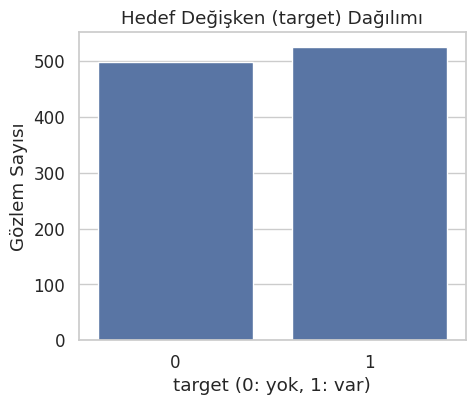


target sınıf oranları:
target
1    0.513171
0    0.486829
Name: proportion, dtype: float64


In [33]:
# target: 1 -> kalp hastalığı var, 0 -> yok
plt.figure(figsize=(5, 4))
sns.countplot(x="target", data=df)
plt.title("Hedef Değişken (target) Dağılımı")
plt.xlabel("target (0: yok, 1: var)")
plt.ylabel("Gözlem Sayısı")
plt.show()

print("\ntarget sınıf oranları:")
print(df["target"].value_counts(normalize=True))

5. ÖZELLİKLERİN TEMEL GÖRSEL ANALİZİ (EDA)

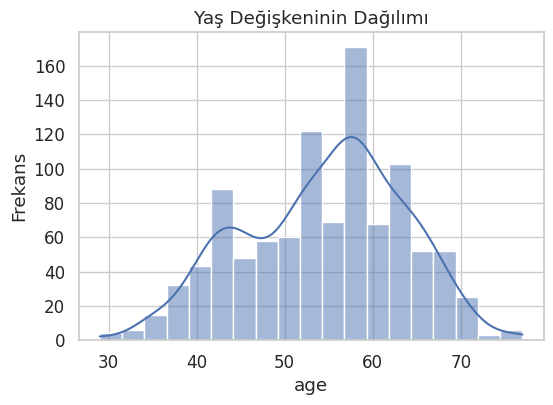

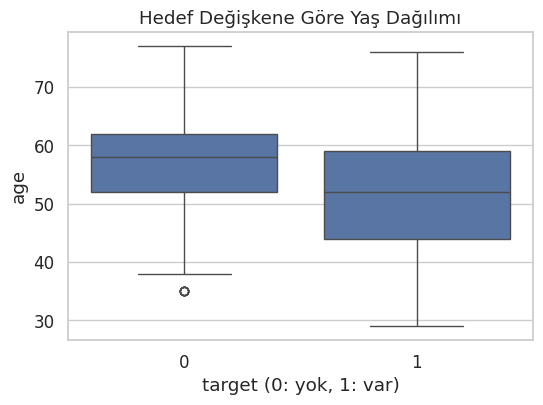

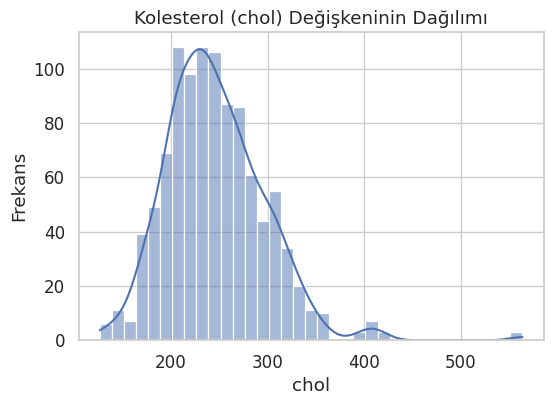

In [34]:
# Örnek olarak birkaç önemli değişkenin dağılımını inceleyelim
numeric_cols = df.columns.drop("target")  # tüm bağımsız değişkenler

# Yaş dağılımı
plt.figure(figsize=(6, 4))
sns.histplot(df["age"], kde=True)
plt.title("Yaş Değişkeninin Dağılımı")
plt.xlabel("age")
plt.ylabel("Frekans")
plt.show()

# Yaşa göre hedef değişken
plt.figure(figsize=(6, 4))
sns.boxplot(x="target", y="age", data=df)
plt.title("Hedef Değişkene Göre Yaş Dağılımı")
plt.xlabel("target (0: yok, 1: var)")
plt.ylabel("age")
plt.show()

# Kolesterol dağılımı
if "chol" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df["chol"], kde=True)
    plt.title("Kolesterol (chol) Değişkeninin Dağılımı")
    plt.xlabel("chol")
    plt.ylabel("Frekans")
    plt.show()

6. KORELASYON MATRİSİ

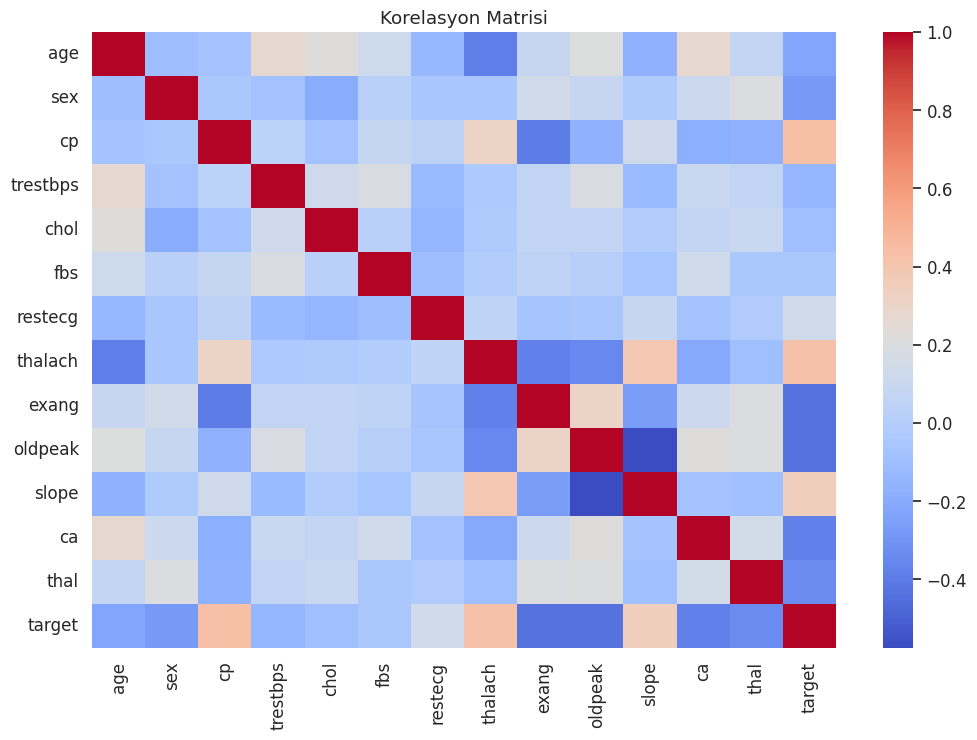

In [35]:
# Korelasyon matrisi: sayısal değişkenler arasındaki ilişkiyi gösterir.
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

7. ÖZELLİKLER VE HEDEFİN AYRILMASI

In [36]:
# Hedef değişken
y = df["target"]

# Bağımsız değişkenler
X = df.drop("target", axis=1)

print("\nBağımsız değişkenlerin ilk 5 satırı:")
display(X.head())

print("\nHedef değişkenin ilk 5 satırı:")
display(y.head())


Bağımsız değişkenlerin ilk 5 satırı:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2



Hedef değişkenin ilk 5 satırı:


,target
0,0
1,0
2,0
3,0
4,0


8. VERİNİN ÖLÇEKLENMESİ (SCALING)

In [37]:
# Özellikle KNN ve MLP gibi mesafe/hız duyarlı algoritmalar için önemlidir.

scaler = StandardScaler()

# Tüm X değişkenlerine standartlaştırma uyguluyoruz
X_scaled = scaler.fit_transform(X)

print("\nÖlçeklendirilmiş verinin (X_scaled) örnek ilk 5 gözlemi:")
print(X_scaled[:5])


Ölçeklendirilmiş verinin (X_scaled) örnek ilk 5 gözlemi:
[[-0.26843658  0.66150409 -0.91575542 -0.37763552 -0.65933209 -0.41887792
   0.89125488  0.82132052 -0.71228712 -0.06088839  0.99543334  1.20922066
   1.08985168]
 [-0.15815703  0.66150409 -0.91575542  0.4791073  -0.83386117  2.38733039
  -1.00404855  0.2559679   1.40392824  1.72713707 -2.24367514 -0.73197147
   1.08985168]
 [ 1.71659547  0.66150409 -0.91575542  0.76468824 -1.39623266 -0.41887792
   0.89125488 -1.04869198  1.40392824  1.30141672 -2.24367514 -0.73197147
   1.08985168]
 [ 0.72407944  0.66150409 -0.91575542  0.93603681 -0.83386117 -0.41887792
   0.89125488  0.51689988 -0.71228712 -0.91232909  0.99543334  0.23862459
   1.08985168]
 [ 0.834359   -1.51170646 -0.91575542  0.36487493  0.93082177  2.38733039
   0.89125488 -1.87497657 -0.71228712  0.70540823 -0.6241209   2.17981673
  -0.52212231]]


9. EĞİTİM - TEST AYRIMI

In [38]:
# Verinin bir kısmını model eğitimi, bir kısmını da performans ölçümü için ayırıyoruz.

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,         # %20 test, %80 eğitim
    random_state=RANDOM_STATE,
    stratify=y
)

print("\nEğitim ve test setlerinin boyutları:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


Eğitim ve test setlerinin boyutları:
X_train: (820, 13)
X_test : (205, 13)
y_train: (820,)
y_test : (205,)


10. YARDIMCI FONKSİYON: MODEL EĞİTİM ve DEĞERLENDİRME

In [43]:
def train_and_evaluate(model, model_name, X_train, X_test, y_train, y_test):
    """
    Verilen modeli eğiten ve temel sınıflandırma performansını raporlayan yardımcı fonksiyon.

    Parametreler:
        model      : sklearn sınıflandırma modeli
        model_name : str, modelin ismi (örneğin 'KNN', 'MLP', 'LogReg')
        X_train    : eğitim özellikleri
        X_test     : test özellikleri
        y_train    : eğitim etiketleri
        y_test     : test etiketleri
    """
    print(f"\n==================== {model_name} ====================")

    # Modelin eğitilmesi
    model.fit(X_train, y_train)

    # Test verisi üzerinde tahmin
    y_pred = model.predict(X_test)

    # Temel doğruluk skoru
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.4f}")

    # Detaylı sınıflandırma raporu
    print("\nSınıflandırma Raporu:")
    print(classification_report(y_test, y_pred))

    # Karışıklık matrisi (Confusion Matrix)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Tahmin Edilen")
    plt.ylabel("Gerçek")
    plt.show()

    return acc

11. FARKLI MODELLERİN KURULMASI

In [40]:
# Lojistik Regresyon (baseline, klasik doğrusal model)
log_reg = LogisticRegression(random_state=RANDOM_STATE, max_iter=500)

# K-En Yakın Komşu (KNN) modeli
# n_neighbors: bakılan komşu sayısı (deneme-yanılma ile iyileştirilebilir)
knn = KNeighborsClassifier(n_neighbors=5)

# MLP (Yapay Sinir Ağı) modeli
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation="relu",
    max_iter=500,
    random_state=RANDOM_STATE
)

12. MODELLERİN EĞİTİLMESİ VE PERFORMANS KARŞILAŞTIRMASI


==================== Lojistik Regresyon ====================
Lojistik Regresyon Accuracy: 0.8098

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



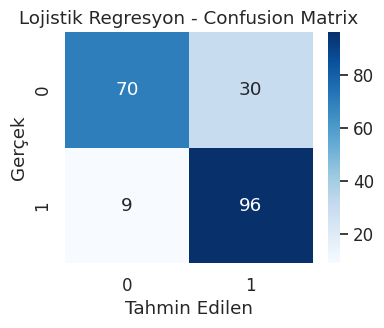


==================== KNN ====================
KNN Accuracy: 0.8634

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       100
           1       0.87      0.86      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



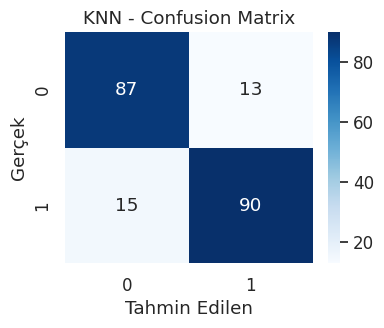


==================== MLP (Yapay Sinir Ağı) ====================
MLP (Yapay Sinir Ağı) Accuracy: 1.0000

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



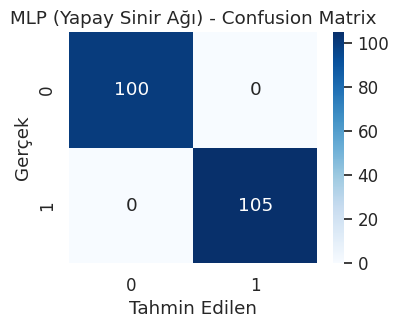


Model Doğruluk Skorları:
Lojistik Regresyon: 0.8098
KNN: 0.8634
MLP (Yapay Sinir Ağı]: 1.0000


In [41]:
results = {}  # model adlarını ve doğruluk skorlarını saklamak için sözlük

# Lojistik Regresyon
acc_log_reg = train_and_evaluate(log_reg, "Lojistik Regresyon", X_train, X_test, y_train, y_test)
results["Lojistik Regresyon"] = acc_log_reg

# KNN
acc_knn = train_and_evaluate(knn, "KNN", X_train, X_test, y_train, y_test)
results["KNN"] = acc_knn

# MLP
acc_mlp = train_and_evaluate(mlp, "MLP (Yapay Sinir Ağı)", X_train, X_test, y_train, y_test)
results["MLP (Yapay Sinir Ağı]"] = acc_mlp

print("\nModel Doğruluk Skorları:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")

13. MODELLERİN KARŞILAŞTIRMALI GRAFİĞİ

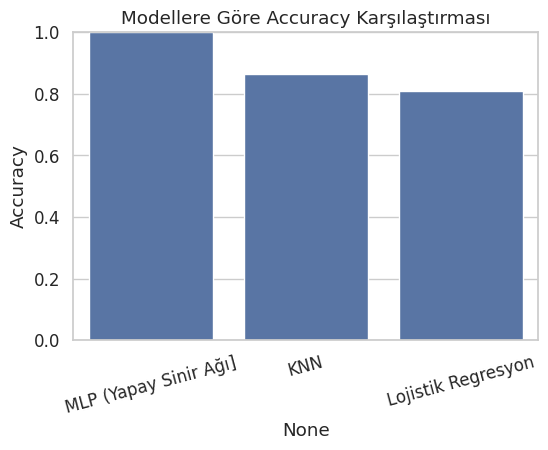


En iyi performansı gösteren model:
                       Accuracy
MLP (Yapay Sinir Ağı]       1.0


In [42]:
# Son olarak sonuçları bir DataFrame'e çevirip çubuk grafik çizelim
results_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=results_df.index, y="Accuracy", data=results_df)
plt.ylim(0, 1)
plt.title("Modellere Göre Accuracy Karşılaştırması")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.show()

print("\nEn iyi performansı gösteren model:")
print(results_df.head(1))